In [1]:
import os
import sys

proj_root = os.getcwd() + "/.."
os.chdir(proj_root)
sys.path.append(proj_root)

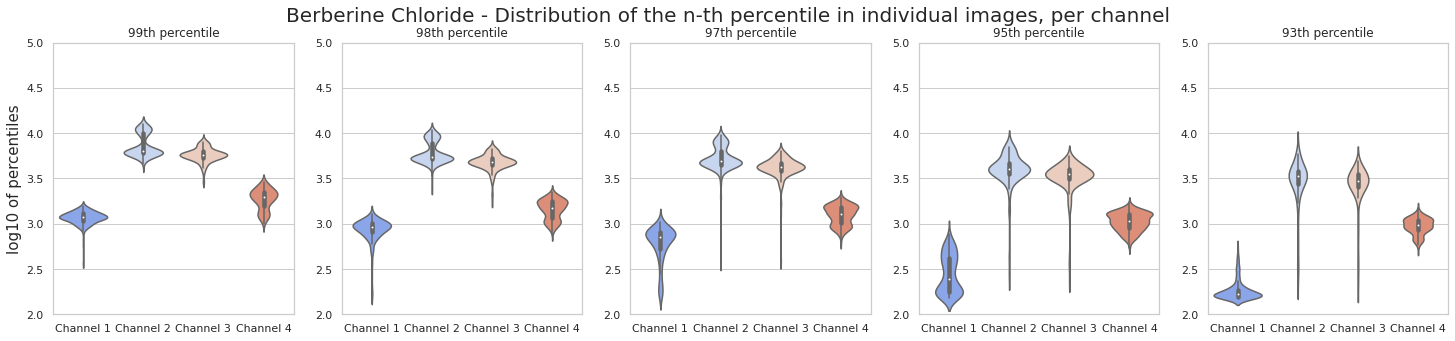

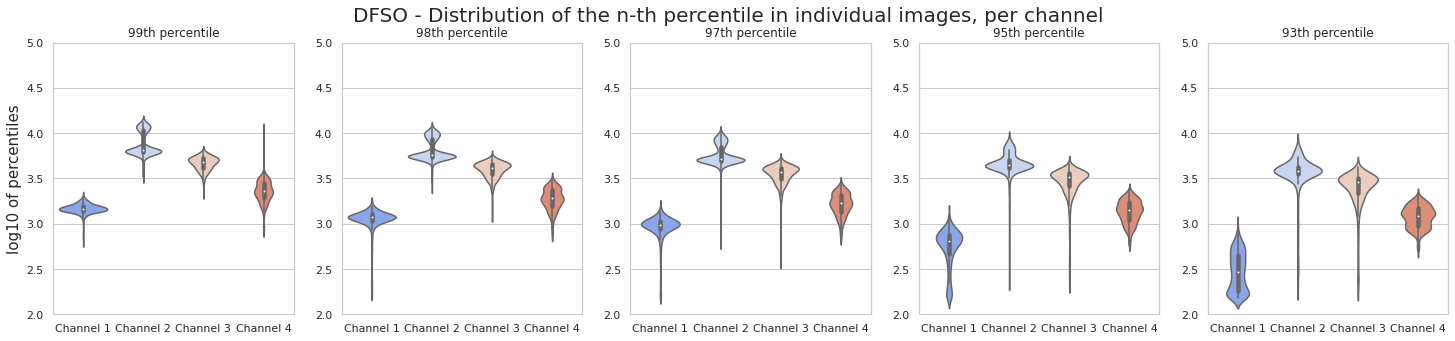

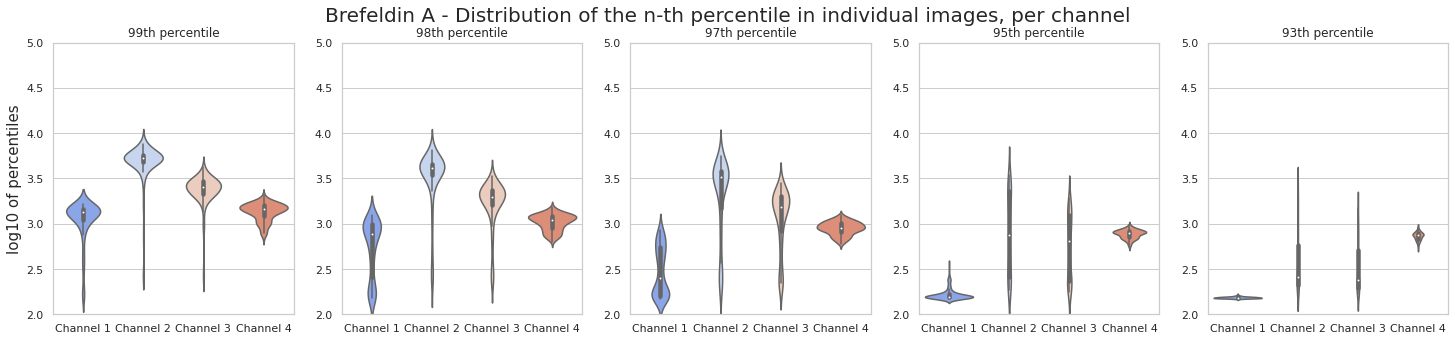

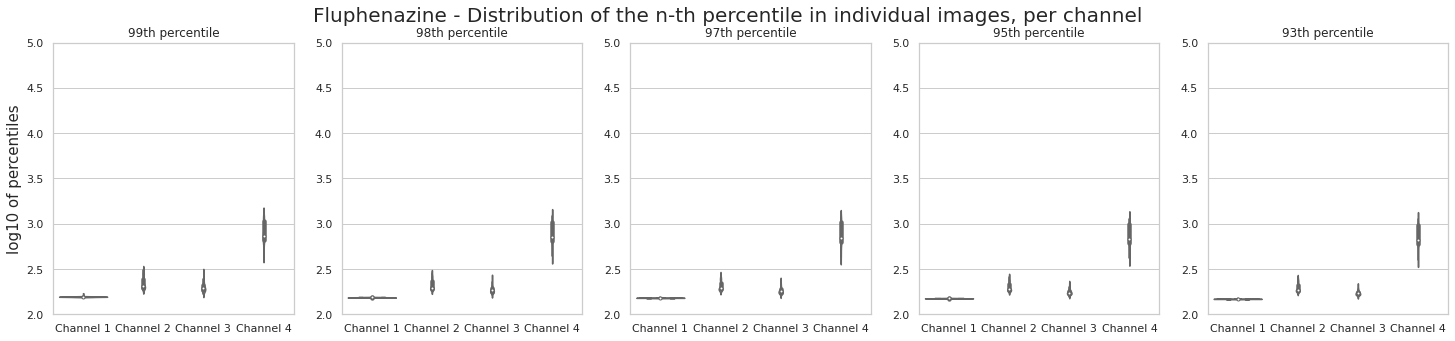

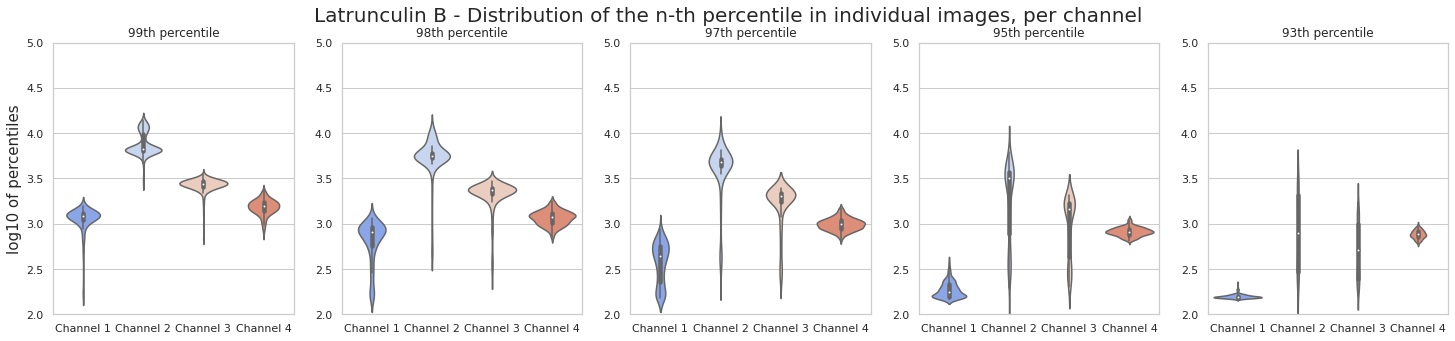

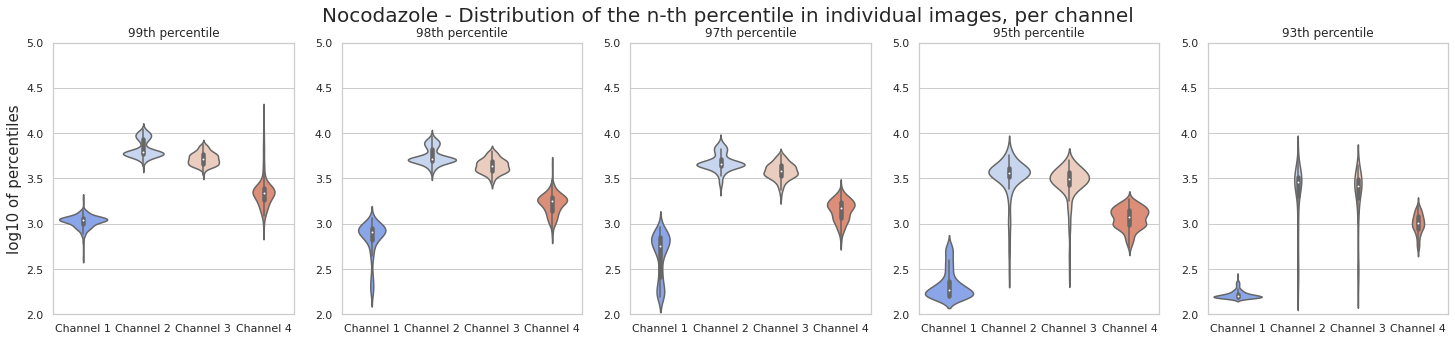

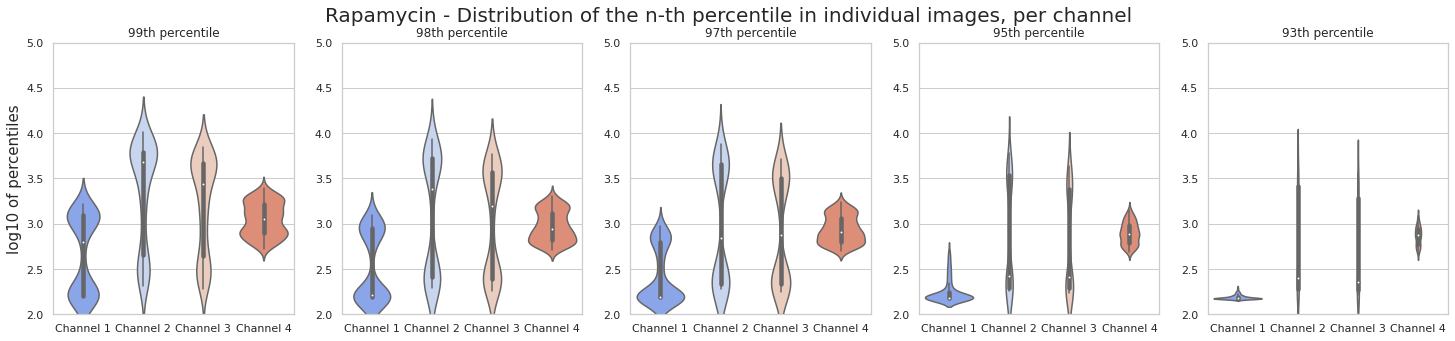

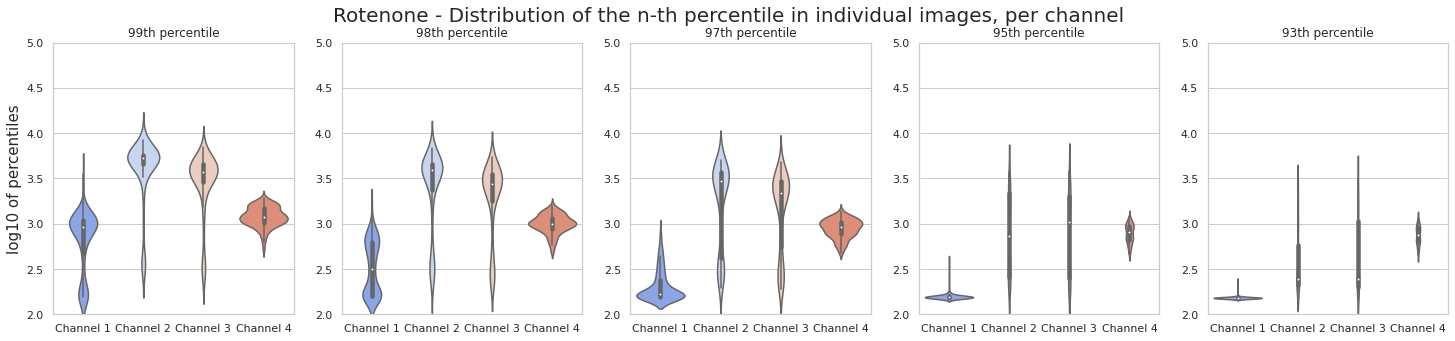

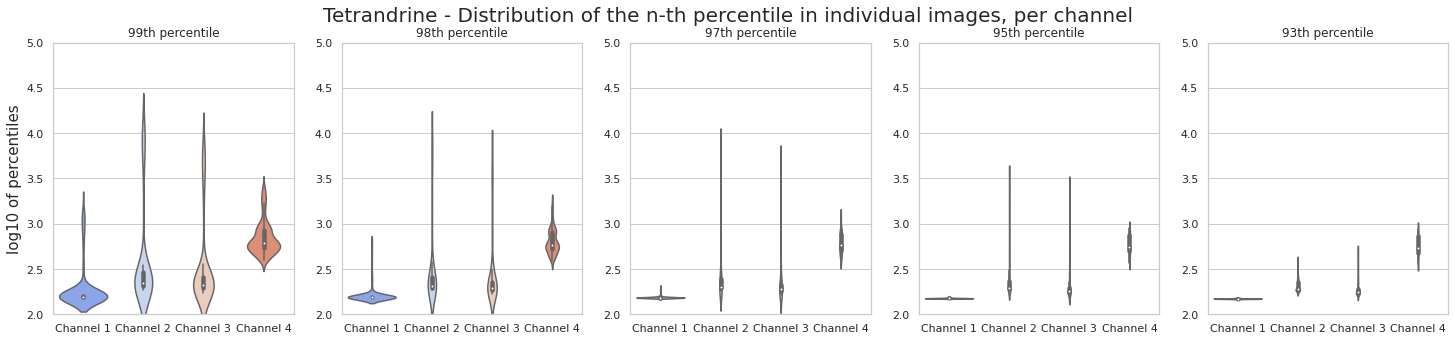

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from tifffile import imread
import matplotlib.pyplot as plt
from src.models.config import Config

plt.rcParams["figure.figsize"] = (25,5)
sns.set_theme(style="whitegrid")

config = Config()
metadata = pd.read_csv(config.dataset_metadata)
compounds = metadata['compound_name'].unique()

for compound in compounds:
    rows = metadata.loc[metadata['compound_name'] == compound]
    fig, axes = plt.subplots(1, 5)
    fig.suptitle(f"{compound} - Distribution of the n-th percentile in individual images, per channel", fontsize=20)
    for ax_index, percentile in enumerate([99, 98, 97, 95, 93]):
        channel_values_above_percentile = [[], [], [], []]
        for index, row in rows.iterrows():
            
            image = imread(config.data_root_dir / row['filename'])
            for channel in range(4):
                channel_data = image[:,:,channel].flatten()
                channel_values_above_percentile[channel].append(np.percentile(channel_data, percentile))
        for channel in range(4):
            channel_values_above_percentile[channel] = np.log10(np.array(channel_values_above_percentile[channel]))
        plot_data = pd.DataFrame(zip(*channel_values_above_percentile), columns=["Channel 1", "Channel 2", "Channel 3", "Channel 4"])
        plot = sns.violinplot(data=plot_data, palette="coolwarm", ax=axes[ax_index])
        plot.set_title(f"{percentile}th percentile")
        plot.set_yticks(np.arange(2, 5.5, 0.5))
        plot.set_ylim([2, 5])
        if ax_index == 0:
            plot.set_ylabel("log10 of percentiles", fontsize=15)
    plt.show()